## Data preparation
Import the dataset file into a Pandas dataframe

In [1]:
import pandas as pd
data = pd.read_csv('DeliveryTime.csv')
data.head()

,Latitude,Longitude,Product Nr,Actual Delivery Time
0,52.263007,7.005476,5.119010e+12,4
1,51.592293,5.316224,7.187600e+12,7
2,51.594927,4.546363,1.113020e+12,1
3,51.356960,5.311556,2.130740e+12,2
4,51.589600,4.777170,2.136330e+12,17


Evaluate whether the data needs additional cleaning

In [2]:
data.describe()

,Latitude,Longitude,Product Nr,Actual Delivery Time
count,20005.000000,20005.000000,2.000500e+04,20005.000000
mean,52.122797,5.584748,4.637958e+12,3.748063
std,0.564288,0.864061,2.280047e+12,4.489296
min,50.770793,3.387919,1.100030e+12,1.000000
25%,51.641167,4.951427,2.197900e+12,2.000000
50%,52.092734,5.668272,4.199100e+12,3.000000
75%,52.523599,6.257708,6.194950e+12,4.000000
max,53.478596,7.145816,8.200000e+12,50.000000


Convert the Pandas dataframes into numpy array that extracts only the features we am going to work with (ProductNr, Latitude, Longitude) and another array that contains the actual delivery time and an array with the names of the features

In [3]:
x = data[['Product Nr','Latitude','Longitude']].values

y = data['Actual Delivery Time'].values

names = ['Product Nr','Latitude','Longitude']

Splitting the data into 75% training and 25% testing

In [28]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1000)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=1)

# multiplying the lantitude with the longitude in order to get 1D array from 2D array
x_p = x_test[:,0:1] * x_test[:,1:2]
print(x_p)

## Linear Regression 

In [30]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

linreg = regressor.predict(x_test)

In [34]:
# Displaying the Linear Regression score
regressor.score(x_test, y_test)

-0.0007712555701668844

mean_absolute_error: 2.4622382022314824
mean_squared_error: 20.16856488839667
r2_score: -0.0007712555701668844


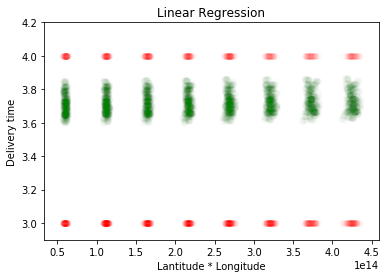

In [33]:
# Visualising the Linear Regression results
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

print("mean_absolute_error: " + str(mean_absolute_error(y_test, linreg)))
print("mean_squared_error: " + str(mean_squared_error(y_test, linreg)))
print("r2_score: " + str(r2_score(y_test, linreg)))

plt.scatter(x_p, y_test, color="red", alpha=0.01)
plt.scatter(x_p, linreg, color="green", alpha=0.01)
plt.ylim(2.9, 4.2)
plt.title("Linear Regression")
plt.xlabel("Lantitude * Longitude")
plt.ylabel("Delivery time")
plt.show()

## Polynomial Regression

In [35]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_train)
X_t_poly = poly_reg.fit_transform(x_test)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

polynom = pol_reg.predict(poly_reg.fit_transform(x_test))

mean_absolute_error: 2.4604015741518914
mean_squared_error: 20.169757293887347
r2_score: -0.0008304231483589053


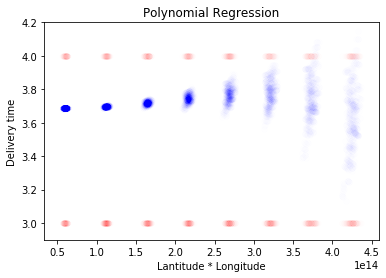

In [37]:
# Visualising the Polynomial Regression results
print("mean_absolute_error: " + str(mean_absolute_error(y_test, polynom)))
print("mean_squared_error: " + str(mean_squared_error(y_test, polynom)))
print("r2_score: " + str(r2_score(y_test, polynom)))

plt.scatter(x_p, y_test, color='red', alpha=0.005)
plt.scatter(x_p, polynom, color='blue', alpha=0.005)
plt.ylim(2.9, 4.2)
plt.title("Polynomial Regression")
plt.xlabel("Lantitude * Longitude")
plt.ylabel("Delivery time")
plt.show()

## Decision Tree Regression

In [52]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [55]:
# Displaying the Decision Tree Regression score
regressor.score(x_test, y_test)

-1.1358773271695162

In [1]:
# Visualising the Decision Tree Regression results


## Support Vector Regression

In [12]:
# Fitting Support Vector Regression to the dataset
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

reg_predict = regressor.predict(x_test)

C:\Users\401148\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


mean_absolute_error: 2.126736824689831
mean_squared_error: 21.06009768751201
r2_score: -0.045009425399788805


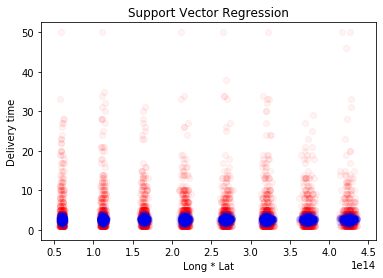

In [24]:
# Visualising the Support Vector Regression results
print("mean_absolute_error: " + str(mean_absolute_error(y_test, reg_predict)))
print("mean_squared_error: " + str(mean_squared_error(y_test, reg_predict)))
print("r2_score: " + str(r2_score(y_test, reg_predict)))

plt.scatter(x_p, y_test, color="red", alpha=0.05)
plt.scatter(x_p, reg_predict, color="blue", alpha=0.05)
# plt.ylim(2.9, 4.2)
plt.title("Support Vector Regression")
plt.xlabel("Long * Lat")
plt.ylabel("Delivery time")
plt.show()

## Random Forest

In [19]:
# Fitting Random forest to the dataset
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state = 1)
regressor.fit(x_train,y_train)

redict = regressor.predict(x_test)

mean_absolute_error: 2.8882167609146823
mean_squared_error: 24.74920754572321
r2_score: -0.22806434899836137


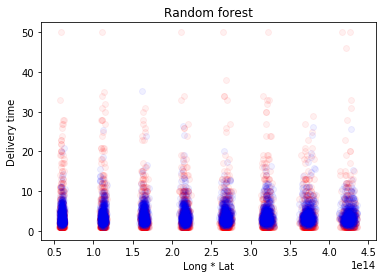

In [23]:
print("mean_absolute_error: " + str(mean_absolute_error(y_test, redict)))
print("mean_squared_error: " + str(mean_squared_error(y_test, redict)))
print("r2_score: " + str(r2_score(y_test, redict)))

plt.scatter(x_p, y_test, color="red", alpha=0.06)
plt.scatter(x_p, redict, color="blue", alpha=0.06)
# plt.ylim(2.9, 4.2)
plt.title("Random forest")
plt.xlabel("Long * Lat")
plt.ylabel("Delivery time")
plt.show()